**KLASIFIKASI PENYAKIT DIABETES MENGGUNAKAN NAIVE BAYES**

In [ ]:
import numpy as np  # Library untuk operasi numerik yang efisien, terutama untuk array dan matriks multidimensi.
import pandas as pd  # Library untuk manipulasi dan analisis data, menyediakan struktur data seperti DataFrame dan Series.

from sklearn import model_selection  # Submodule dari scikit-learn yang menyediakan fungsi untuk membagi dataset menjadi subset.
from sklearn.model_selection import train_test_split  # Fungsi untuk membagi dataset menjadi set pelatihan dan set pengujian.

from sklearn.metrics import classification_report  # Fungsi untuk menghasilkan laporan teks yang menunjukkan metrik klasifikasi seperti precision, recall, dan F1-score.
from sklearn.metrics import confusion_matrix  # Fungsi untuk menghitung matriks kebingungan, yang menunjukkan jumlah prediksi benar dan salah yang dibuat oleh model.
from sklearn.metrics import accuracy_score  # Fungsi untuk menghitung persentase prediksi yang benar dari total prediksi yang dilakukan oleh model.


In [ ]:
#import library yyang dibutuhkan
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
# File data input tersedia di direktori "../input/". # Misalnya, menjalankan ini (dengan mengklik run atau menekan Shift+Enter) akan mencantumkan semua file di bawah direktori input
#membaca data diabetes.csv dari upload file
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


***Exploratory data analysis **

Sekarang, saya akan mengeksplorasi data untuk mendapatkan wawasan tentang data tersebut.

In [ ]:
# view dimensions of dataset

df.shape

(768, 9)

 Kita dapat melihat ada 768 instance dan 9 atribut dalam kumpulan data .

Lihat 5 baris kumpulan data teratas

In [ ]:
# preview the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Ganti nama nama kolom

Kita dapat melihat bahwa kumpulan data tidak memiliki nama kolom yang tepat. Kolom hanya diberi label 0,1,2.... dan seterusnya. Kita harus memberi nama yang tepat pada kolomnya. Saya akan melakukannya sebagai berikut: -

In [ ]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
             'Outcome']

df.columns = col_names

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# let's again preview the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Kita dapat melihat bahwa nama kolom diganti namanya. Sekarang, kolom-kolom tersebut memiliki nama yang bermakna.

lihat ringkasan dataset

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Kita dapat melihat bahwa tidak ada nilai yang hilang dalam dataset. Saya akan mengkonfirmasi hal ini lebih lanjut.

**Explore Numerical Variabls**

In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
# view the numerical variables

df[numerical].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Ringkasan variabel numerik


*  Ada 9 variabel numerik.
*   Variabel-variabel tersebut adalah Pregnancies, Glucose, 'BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
*  Semua variabel numerik tersebut memiliki tipe data diskrit.








mencari  missing value  dalam variabel numerik
Sekarang, saya akan mengeksplorasi variabel numerik.

Missing values in numerical variables

In [ ]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Kita dapat melihat bahwa 9 variabel numerik tersebut tidak mengandung nilai yang hilang.

Mendeklarasikan vektor fitur dan variabel target

In [ ]:
X = df.drop(['Outcome'], axis=1)

y = df['Outcome']

**Split data into separate training and test set**

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((537, 8), (231, 8))

** Rekayasa Fitur**

Rekayasa Fitur adalah proses mengubah data mentah menjadi fitur yang berguna  membantu kita memahami model kita dengan lebih baik dan meningkatkan daya prediksinya. Saya akan melakukan rekayasa fitur pada berbagai jenis variabel.

Pertama, saya akan menampilkan variabel kategorikal dan numerik secara terpisah. Akana tetapi, dari data sudah dalam bentuk numerik maka saya akan menampilkan yangnumerik




In [ ]:
# check data types in X_train

X_train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# check missing values in X_train

X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
# check missing values in X_test

X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Kita sekarang memiliki set pelatihan dan pengujian yang siap untuk membangun model. Sebelum itu, kita harus memetakan semua variabel fitur ke dalam skala yang sama. Ini disebut penskalaan fitur. Saya akan melakukannya sebagai berikut.

**Feature Scaling**

In [ ]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.6,0.767442,1.125,0.666667,-0.333333,1.043011,-0.018767,-0.470588
1,-0.4,-0.813953,-0.250,-0.727273,-0.333333,-1.526882,0.659517,-0.117647
2,-0.2,0.093023,-0.125,0.090909,-0.333333,0.473118,-0.101877,-0.117647
3,0.2,0.651163,0.375,-0.727273,-0.333333,0.655914,0.380697,2.235294
4,-0.6,0.116279,0.000,-0.727273,-0.333333,0.419355,-0.321716,1.352941


Kita sekarang memiliki dataset X_train yang siap untuk dimasukkan ke dalam pengklasifikasi Gaussian Naive Bayes. Saya akan melakukannya sebagai berikut.

** Model training **

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

**Predict the results **

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

**Check accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7619


Kita sekarang memiliki dataset X_train yang siap untuk dimasukkan ke dalam pengklasifikasi Gaussian Naive Bayes. Di sini, y_test adalah label kelas yang sebenarnya dan y_pred adalah label kelas yang diprediksi dalam set pengujian.

**Membandingkan akurasi set latih dan set uji**

Sekarang, saya akan membandingkan akurasi train-set dan test-set untuk memeriksa overfitting.

In [ ]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7672


Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7672
Test set score: 0.7619


Nilai akurasi training-set adalah 0,7672 sedangkan akurasi test-set adalah 0,7619 . Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting.

Bandingkan akurasi model dengan akurasi nol

Jadi, akurasi model adalah 0,7619. Namun, kita tidak bisa mengatakan bahwa model kita sangat bagus berdasarkan akurasi di atas. Kita harus membandingkannya dengan akurasi nol. Akurasi nol adalah akurasi yang dapat dicapai dengan selalu memprediksi kelas yang paling sering muncul.
Jadi, pertama-tama kita harus memeriksa distribusi kelas dalam set pengujian.

In [ ]:
# check class distribution in test set

y_test.value_counts()

Outcome
0    157
1     74
Name: count, dtype: int64

Kita dapat melihat bahwa kemunculan kelas yang paling sering adalah  157. Jadi, kita dapat menghitung akurasi nol dengan membagi  157 dengan jumlah total kemunculan.

In [ ]:
# check null accuracy score

null_accuracy = (157/(157+74))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6797


Kita dapat melihat bahwa nilai akurasi model kami adalah 0.7619 tetapi nilai akurasi nol adalah 0.6797. Jadi, kita dapat menyimpulkan bahwa model Klasifikasi Gaussian Naive Bayes kami melakukan pekerjaan yang sangat baik dalam memprediksi label kelas.

Sekarang, berdasarkan analisis di atas, saya dapat menyimpulkan bahwa akurasi model klasifikasi saya sangat baik. Model kami melakukan pekerjaan yang sangat baik dalam hal memprediksi label kelas.

Namun, model ini tidak memberikan distribusi nilai yang mendasarinya. Selain itu, model ini tidak memberi tahu apa pun tentang jenis kesalahan yang dibuat oleh pengklasifikasi kami.



**Evaluasi Model**

confussin matrix adalah alat untuk meringkas kinerja algoritme klasifikasi. confussion matrix akan memberikan gambaran yang jelas tentang kinerja model klasifikasi dan jenis kesalahan yang dihasilkan oleh model tersebut. Matriks ini memberikan kita ringkasan prediksi yang benar dan salah yang dirinci berdasarkan setiap kategori. Ringkasan ini direpresentasikan dalam bentuk tabel.

Ada empat jenis hasil yang mungkin terjadi saat mengevaluasi kinerja model klasifikasi. Keempat hasil ini dijelaskan di bawah ini:-

True Positives (TP) - True Positives terjadi ketika kita memprediksi sebuah observasi termasuk ke dalam kelas tertentu dan observasi tersebut benar-benar termasuk ke dalam kelas tersebut.

True Negatives (TN) - True Negatives terjadi ketika kita memprediksi sebuah observasi tidak termasuk ke dalam kelas tertentu dan observasi tersebut sebenarnya tidak termasuk ke dalam kelas tersebut.

False Positives (FP) - False Positives terjadi ketika kita memprediksi sebuah observasi termasuk ke dalam kelas tertentu, namun observasi tersebut sebenarnya tidak termasuk ke dalam kelas tersebut. Jenis kesalahan ini disebut kesalahan Tipe I.

False Negatives (FN) - False Negatives terjadi ketika kita memprediksi sebuah observasi tidak termasuk ke dalam kelas tertentu, tetapi observasi tersebut sebenarnya termasuk ke dalam kelas tersebut. Ini adalah kesalahan yang sangat serius dan disebut kesalahan Tipe II.

Keempat hasil ini dirangkum dalam matriks kebingungan yang diberikan di bawah ini.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[138  19]
 [ 36  38]]

True Positives(TP) =  138

True Negatives(TN) =  38

False Positives(FP) =  19

False Negatives(FN) =  36


confussion matrix  menunjukkan 138+ 38 = 176  prediksi yang benar dan 19 + 36 = 55 prediksi yang salah.

Dalam hal ini, kita memiliki

Positif Sejati (Positif Aktual: 1 dan Prediksi Positif: 1) - 138
Negatif Sejati (Negatif Sebenarnya: 0 dan Prediksi Negatif: 0) - 38
Positif Palsu (Negatif Aktual: 0 tetapi Prediksi Positif: 1) - 19(Kesalahan Tipe I)
Negatif Palsu (Positif Sebenarnya: 1 tetapi Prediksi Negatif: 0) - 36 (Kesalahan Tipe II)

<Axes: >

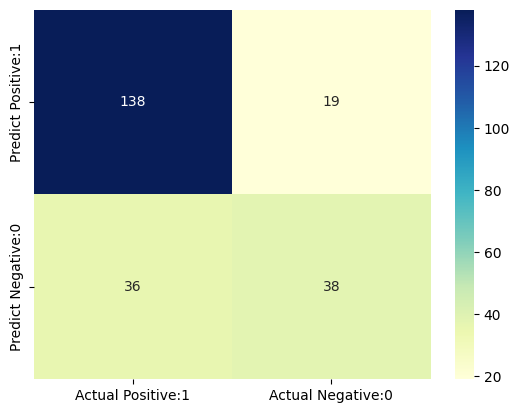

In [ ]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns  # Add this import statement
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification metrices
Laporan Klasifikasi
Laporan klasifikasi adalah cara lain untuk mengevaluasi kinerja model klasifikasi. Laporan ini menampilkan nilai presisi, recall, f1, dan dukungan untuk model. Saya akan menjelaskan istilah-istilah ini nanti.

Saya dapat mencetak laporan klasifikasi sebagai berikut:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



Classification accuracy

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7619


Presisi
Presisi dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang diprediksi. Hal ini dapat diberikan sebagai rasio positif sejati (TP) terhadap jumlah positif sejati dan salah (TP + FP).

Jadi, Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar. Hal ini lebih berkaitan dengan kelas positif daripada kelas negatif.

Secara matematis, presisi dapat didefinisikan sebagai rasio TP terhadap (TP + FP).

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2381


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8790


Mengingat
Recall dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang sebenarnya. Hal ini dapat diberikan sebagai rasio positif sejati (TP) terhadap jumlah positif sejati dan negatif palsu (TP + FN). Recall juga disebut Sensitivitas.

Recall mengidentifikasi proporsi positif aktual yang diprediksi dengan benar.

Secara matematis, recall dapat diberikan sebagai rasio TP terhadap (TP + FN).

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7931


True Positive Rate
True Positive Rate is synonymous with Recall.

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7931


False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3333


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6667


f1-skor
f1-score adalah rata-rata harmonik tertimbang dari presisi dan recall. Nilai f1-score terbaik adalah 1.0 dan yang terburuk adalah 0.0. f1-score adalah rata-rata harmonik dari presisi dan recall. Jadi, f1-score selalu lebih rendah daripada ukuran akurasi karena mereka memasukkan presisi dan recall ke dalam komputasinya. Rata-rata tertimbang dari f1-score harus digunakan untuk membandingkan model-model pengklasifikasi, bukan akurasi global.

Dukungan
Dukungan adalah jumlah kemunculan aktual dari kelas dalam dataset kami

 Calculate class probabilities

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.00340485, 0.99659515],
       [0.94024088, 0.05975912],
       [0.9655907 , 0.0344093 ],
       [0.26817902, 0.73182098],
       [0.95839654, 0.04160346],
       [0.98642007, 0.01357993],
       [0.09982287, 0.90017713],
       [0.02342492, 0.97657508],
       [0.1456696 , 0.8543304 ],
       [0.55473744, 0.44526256]])

Pengamatan
Di setiap baris, angka-angka berjumlah 1.
Ada 2 kolom yang sesuai dengan 2 kelas 0  dan 1.

Kelas 0 => 0 - Kelas dimana seseorang tidak menderita diabetes

Kelas 1 => 1 - Kelas dimana seseorang menderita diabetes

Pentingnya prediksi probabilitas

Kita dapat mengurutkan observasi berdasarkan probabilitas apakah seseorang menderita atau tidak  sama dengan 0 atau 1
proses prediksi_proba

Memprediksi probabilitas

Pilih kelas dengan probabilitas tertinggi

Tingkat ambang batas klasifikasi

Ada tingkat ambang batas klasifikasi sebesar 0,5.

Kelas 0 => 0 - probabilitas orang tida terkena diabetes diprediksi jika probabilitas < 0.5.

Kelas 1 => 1 - probabilitas orang terkena diabetes diprediksi jika probabilitas > 0,5.

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of 0', 'Prob of 1'])

y_pred_prob_df

,Prob of 0,Prob of 1
0,0.003405,0.996595
1,0.940241,0.059759
2,0.965591,0.034409
3,0.268179,0.731821
4,0.958397,0.041603
5,0.986420,0.013580
6,0.099823,0.900177
7,0.023425,0.976575
8,0.145670,0.854330
9,0.554737,0.445263


In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of 1K

gnb.predict_proba(X_test)[0:10, 1]

array([0.99659515, 0.05975912, 0.0344093 , 0.73182098, 0.04160346,
       0.01357993, 0.90017713, 0.97657508, 0.8543304 , 0.44526256])

In [ ]:
# store the predicted probabilities for class 1 - Probability of 1

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

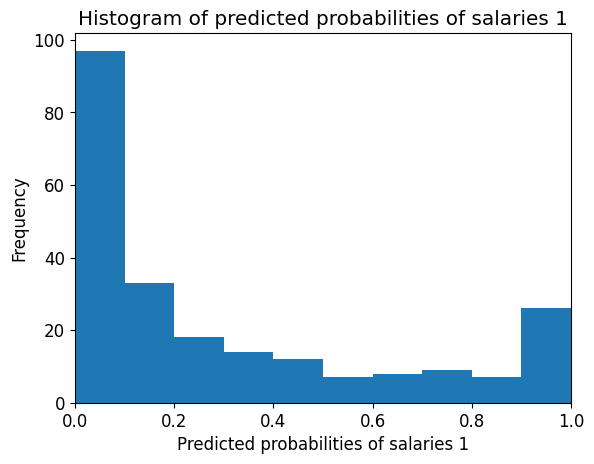

In [ ]:
# plot histogram of predicted probabilities
import matplotlib.pyplot as plt

# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries 1')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries 1')
plt.ylabel('Frequency')

observasi
Kita dapat melihat bahwa histogram di atas memiliki kemiringan yang sangat positif.
Kolom pertama memberi tahu kita bahwa ada sekitar 99 observasi dengan probabilitas antara 0,0 dan 0,1 yang tidak menderita diabetes.
Terdapat sejumlah kecil observasi dengan probabilitas > 0.5.
Jadi, sejumlah kecil observasi ini memprediksi bahwamenderita diabetes.
Mayoritas observasi memprediksi bahwa tidak menderita diabetes

ROC - AUC

Kurva ROC
Alat lain untuk mengukur kinerja model klasifikasi secara visual adalah ROC Curve. Kurva ROC adalah singkatan dari Kurva Karakteristik Operasi Penerima. Kurva ROC adalah plot yang menunjukkan kinerja model klasifikasi pada berbagai tingkat ambang batas klasifikasi.

Kurva ROC memplotkan Tingkat Positif Sejati (TPR) terhadap Tingkat Positif Palsu (FPR) pada berbagai tingkat ambang batas.

True Positive Rate (TPR) juga disebut Recall. Hal ini didefinisikan sebagai rasio TP terhadap (TP + FN).

False Positive Rate (FPR) didefinisikan sebagai rasio FP terhadap (FP + TN).

Dalam Kurva ROC, kita akan fokus pada TPR (True Positive Rate) dan FPR (False Positive Rate) dari satu titik. Hal ini akan memberikan kita performa umum dari kurva ROC yang terdiri dari TPR dan FPR pada berbagai tingkat ambang batas. Jadi, Kurva ROC memplot TPR vs FPR pada tingkat ambang batas klasifikasi yang berbeda. Jika kita menurunkan tingkat ambang batas, maka akan menghasilkan lebih banyak item yang diklasifikasikan sebagai positif. Hal ini akan meningkatkan True Positives (TP) dan False Positives (FP).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


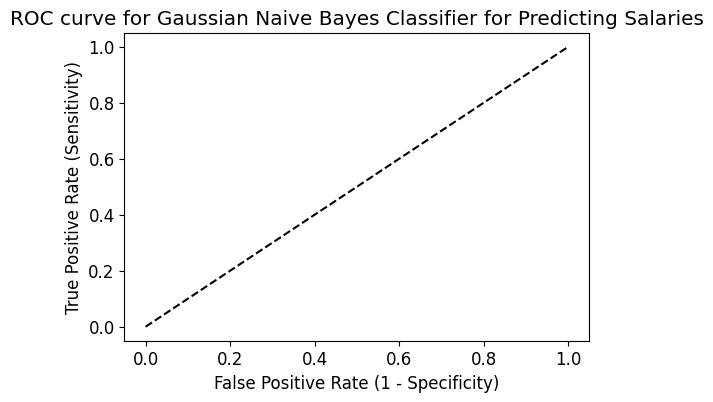

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '1')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC AUC
ROC AUC adalah singkatan dari Karakteristik Operasi Penerima - Area di Bawah Kurva. Ini adalah teknik untuk membandingkan kinerja pengklasifikasi. Dalam teknik ini, kami mengukur area di bawah kurva (AUC). Pengklasifikasi yang sempurna akan memiliki ROC AUC sama dengan 1, sedangkan pengklasifikasi yang murni acak akan memiliki ROC AUC sama dengan 0,5.

Jadi, ROC AUC adalah persentase plot ROC yang berada di bawah kurva.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8039


Interpretasi
ROC AUC adalah ringkasan angka tunggal dari kinerja pengklasifikasi. Semakin tinggi nilainya, semakin baik pengklasifikasi tersebut.

ROC AUC model kami mendekati angka 1. Jadi, kami dapat menyimpulkan bahwa pengklasifikasi kami bekerja dengan baik dalam prediksi penderita penyakit diabetes terkena atau tidak

In [ ]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8146


In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7037037  0.74074074 0.77777778 0.72222222 0.7962963  0.83333333
 0.68518519 0.67924528 0.79245283 0.73584906]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7467


interpretasi
Dengan menggunakan rata-rata validasi silang, kami dapat menyimpulkan bahwa kami mengharapkan model ini memiliki akurasi rata-rata sekitar74,67%.

Jika kita melihat semua 10 skor yang dihasilkan oleh 10 kali validasi silang, kita juga dapat menyimpulkan bahwa ada varians yang relatif kecil dalam akurasi antar lipatan, mulai dari 70,37% akurasi hingga 74,07% akurasi. Jadi, kami dapat menyimpulkan bahwa model ini tidak bergantung pada lipatan tertentu yang digunakan untuk pelatihan.

Akurasi model asli kami adalah  0.7619, tetapi rata-rata akurasi validasi silang adalah 0,7467 . Jadi, akurasi validasi silang 10 kali lipat tidak menghasilkan peningkatan kinerja untuk model ini.